<a href="https://colab.research.google.com/github/gouri1125/ict_project/blob/main/diamond_ml3_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD DATASET DFIAMONDS FROM SEABORN AND DO PREPROCESSING + ML(eg:housepricing + advertising
)

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.shape

(53940, 10)

# **step 1** missing value


In [6]:
#checking null values
diamonds.isnull().sum()
#here is no null value so no need for replacemrnt operation.

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [7]:
#target is price.
#checking for duplicate values
diamonds.duplicated().sum()


np.int64(146)

In [8]:
#remove that 146 rows
diamonds.drop_duplicates(inplace=True)
diamonds.duplicated().sum()

np.int64(0)

In [9]:
freqgraph=diamonds.select_dtypes(include='number')
freqgraph

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

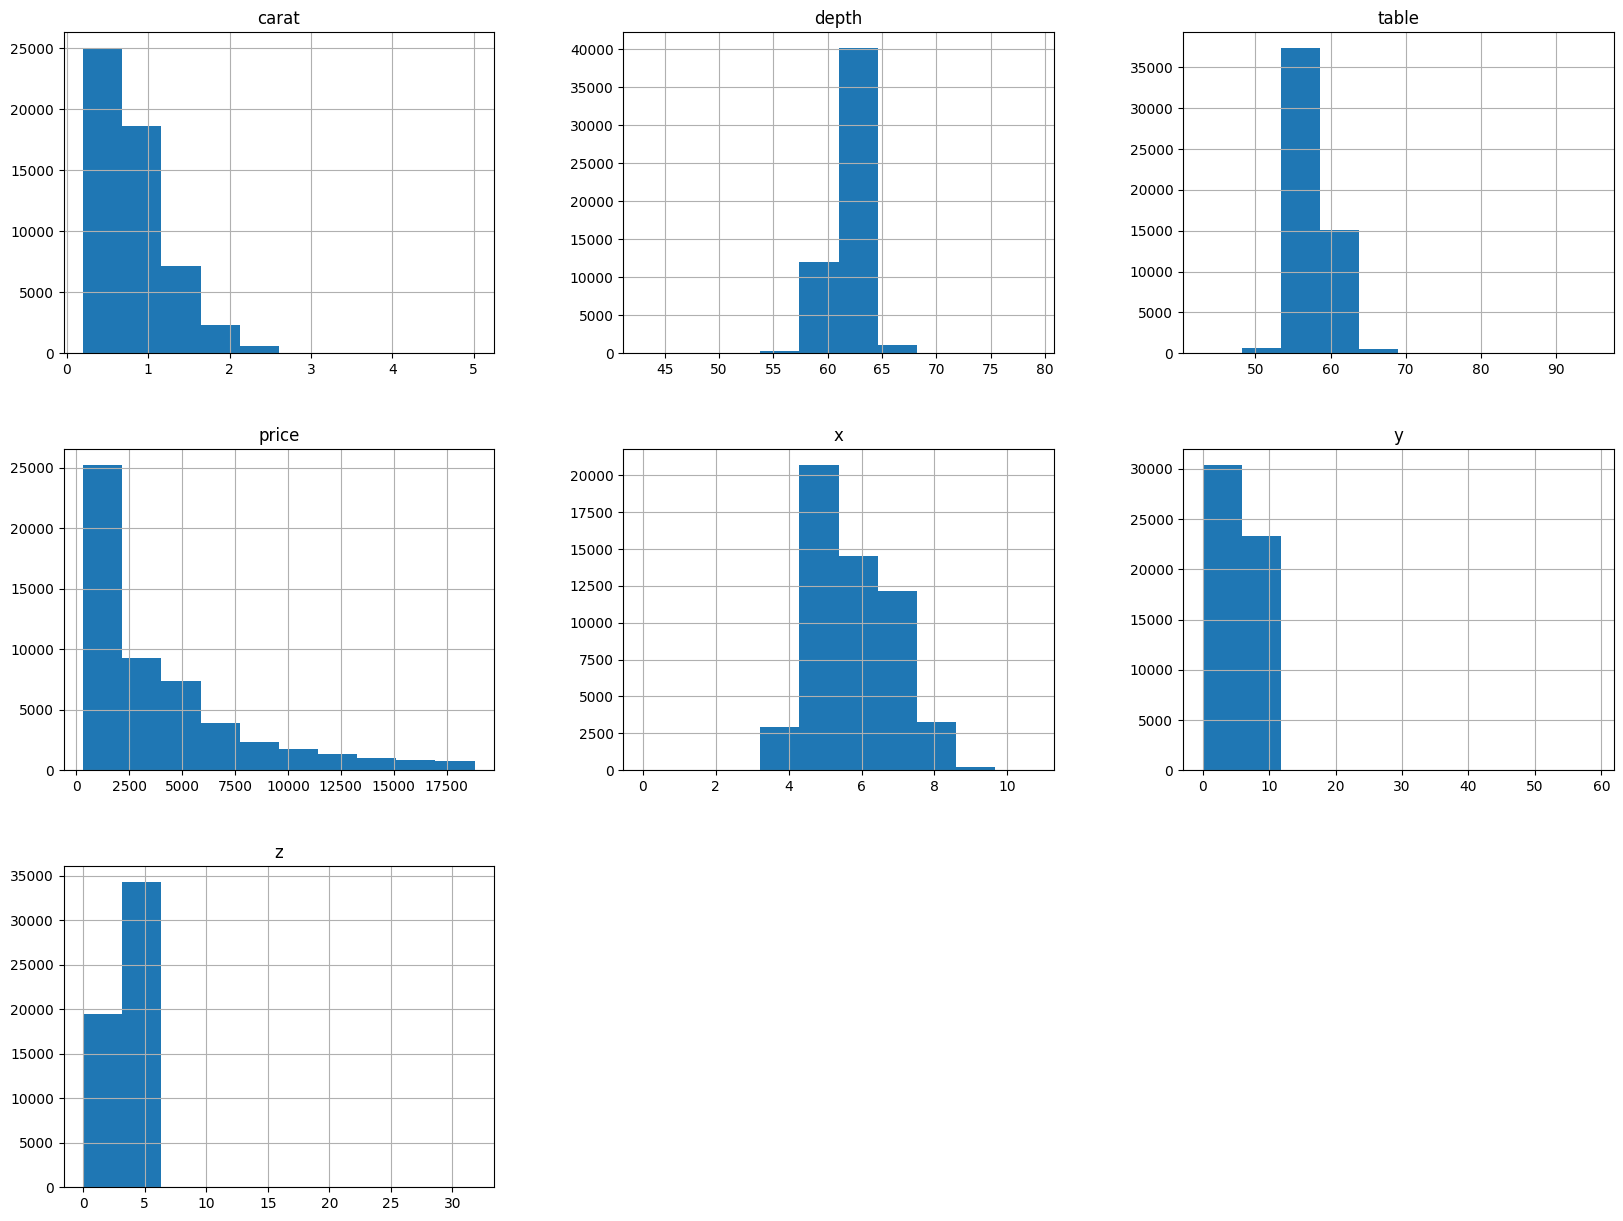

In [10]:
freqgraph.hist(figsize=(20,15))

In [11]:
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


## **2.outlier handling**

<Axes: >

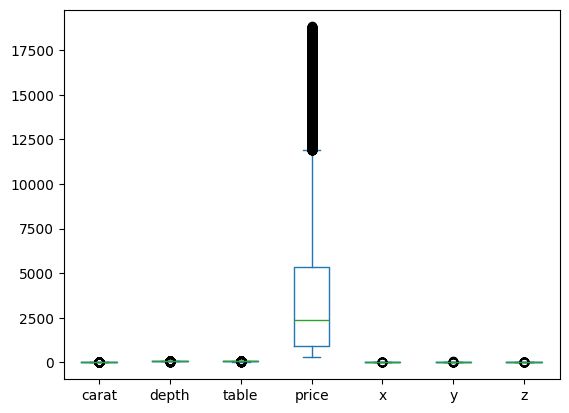

In [20]:
#outlier removal is mainly perform in the numerical data
diamonds.plot(kind="box")

In [18]:
#outlier removal
num_cols = diamonds.select_dtypes(include=["int64", "float64"]).columns
diamonds_clean = diamonds.copy()

for col in num_cols:
    Q1 = diamonds_clean[col].quantile(0.25)
    Q3 = diamonds_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    diamonds_clean = diamonds_clean[
        (diamonds_clean[col] >= lower) &
        (diamonds_clean[col] <= upper)
    ]


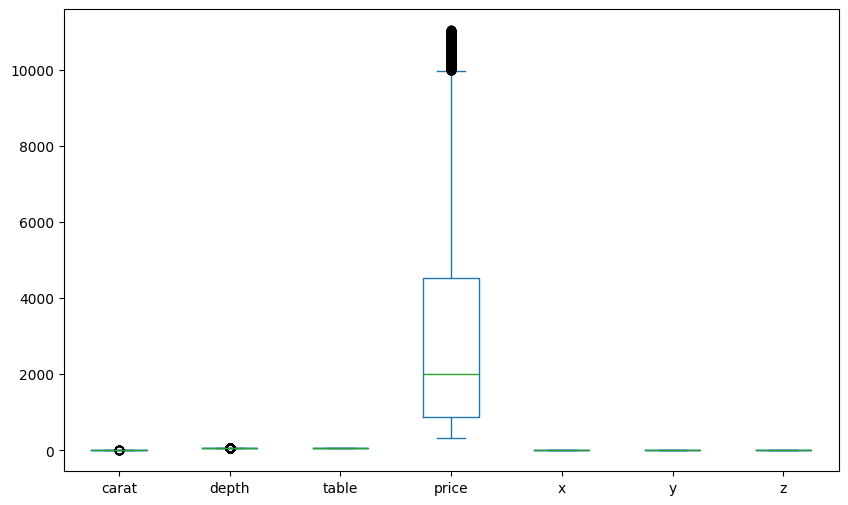

In [19]:
#price is the target value
diamonds_clean.plot(kind="box", figsize=(10,6))
plt.show()

In [21]:
#encoding, is performed in categorical data
#ordinal encoding
cat_cols = ["cut", "color", "clarity"]
diamonds["cut"] = diamonds["cut"].map({
    "Fair": 1,
    "Good": 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5
})

In [22]:
diamonds["color"] = diamonds["color"].map({
    "J": 1,
    "I": 2,
    "H": 3,
    "G": 4,
    "F": 5,
    "E": 6,
    "D": 7
})

In [23]:
diamonds["clarity"] = diamonds["clarity"].map({
    "I1": 1,
    "SI2": 2,
    "SI1": 3,
    "VS2": 4,
    "VS1": 5,
    "VVS2": 6,
    "VVS1": 7,
    "IF": 8
})

In [24]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


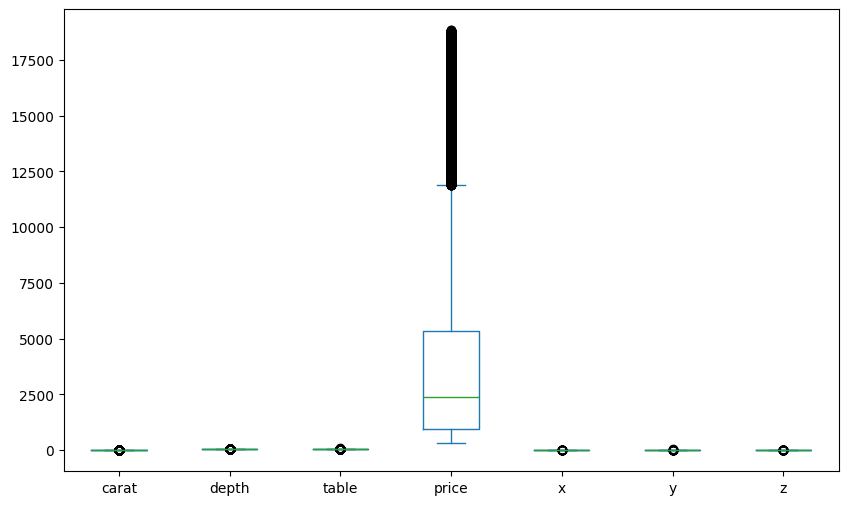

In [26]:
diamonds.plot(kind="box", figsize=(10,6))
plt.show()

In [27]:
diamonds[diamonds.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**spliting 4**

In [28]:
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

In [31]:
X.shape, y.shape

((53794, 9), (53794,))

In [37]:
np.random.seed(42)

indices = np.random.permutation(len(diamonds))

train_size = int(0.8 * len(diamonds))

In [38]:
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]

y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43035, 9), (10759, 9), (43035,), (10759,))

**Scaling 5**

In [50]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
43657,0.71,1,1,4,64.9,54.0,5.63,5.53,3.62
4274,0.90,3,6,2,61.0,59.0,6.14,6.18,3.76
47412,0.57,5,4,5,62.1,56.0,5.30,5.33,3.30
44437,0.51,4,6,4,62.5,60.0,5.08,5.10,3.18
13975,1.19,5,2,3,62.3,55.0,6.80,6.82,4.24


In [45]:
X_train.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
x,float64
y,float64
z,float64


In [52]:
x_train_scaled=sscaler.fit_transform(X_train)
x_test_scaled=sscaler.transform(X_test)

In [53]:
x_train_scaled

array([[-0.18392523, -2.59715884, -2.00602562, ..., -0.08897017,
        -0.17710548,  0.11608285],
       [ 0.21787451, -0.808759  ,  0.93641058, ...,  0.36648478,
         0.38927793,  0.31410417],
       [-0.47998821,  0.97964084, -0.2405639 , ..., -0.38367631,
        -0.3513773 , -0.33653732],
       ...,
       [ 0.42934807, -0.808759  ,  0.93641058, ...,  0.66119092,
         0.69425361,  0.49798111],
       [ 1.02147401,  0.08544092, -1.41753838, ...,  1.03627146,
         0.98180211,  1.0779007 ],
       [-0.50113556,  0.97964084, -0.82905114, ..., -0.38367631,
        -0.41237244, -0.3506817 ]])

In [54]:
x_test_scaled

array([[-1.0509668 ,  0.97964084,  0.34792334, ..., -1.26779473,
        -1.2140228 , -1.19934451],
       [ 0.47164278,  0.97964084, -0.2405639 , ...,  0.60760798,
         0.62454488,  0.69600243],
       [-1.0509668 , -0.808759  , -0.2405639 , ..., -1.29458619,
        -1.29244512, -1.18520013],
       ...,
       [-1.00867209,  0.97964084, -2.00602562, ..., -1.19635081,
        -1.14431408, -1.15691137],
       [ 0.21787451,  0.08544092, -2.00602562, ...,  0.35755429,
         0.25857406,  0.39897045],
       [ 0.45049542,  0.08544092, -0.2405639 , ...,  0.56295554,
         0.50255461,  0.61113615]])

In [44]:
num_cols = X_train.select_dtypes(include=[np.number]).columns

In [42]:
def min_max_scale(train, test, columns):
    train_scaled = train.copy()
    test_scaled = test.copy()

    for col in columns:
        min_val = train[col].min()
        max_val = train[col].max()

        train_scaled[col] = (train[col] - min_val) / (max_val - min_val)
        test_scaled[col] = (test[col] - min_val) / (max_val - min_val)

    return train_scaled, test_scaled


In [47]:
X_train_scaled, X_test_scaled = min_max_scale(
    X_train, X_test, num_cols
)

In [48]:
x_train_scaled.describe()

,carat,depth,table,x,y,z
count,43035.000000,43035.000000,43035.000000,43035.000000,43035.000000,43035.000000
mean,0.156686,0.520740,0.183865,0.571819,0.097339,0.111256
std,0.124115,0.039860,0.048680,0.111754,0.019485,0.022233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052493,0.500000,0.152174,0.470060,0.080136,0.091509
50%,0.131234,0.522222,0.173913,0.567864,0.096944,0.110692
75%,0.220472,0.541667,0.217391,0.652695,0.110866,0.126730
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ML

In [56]:
x= diamonds.drop("price",axis=1)
y=diamonds["price"]

In [65]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40345, 9), (13449, 9), (40345,), (13449,))

In [66]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = lin_model.predict(x_test)
y_pred

array([1432.90912786, 4076.33880648, 2341.80980114, ..., 2973.41725931,
       1114.17457636, 3390.68263096])

In [69]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"r2 = {r2}")

mae = 793.969037562183
mse = 1424207.9122069888
r2 = 0.907338373169241


In [70]:
lin_model.coef_

array([10772.68141188,   119.67039276,   319.61459514,   502.71819651,
         -89.11873106,   -26.54408366,  -922.12467163,    17.10559404,
          64.0368266 ])

In [71]:
lin_model.intercept_

np.float64(3416.4883689099206)

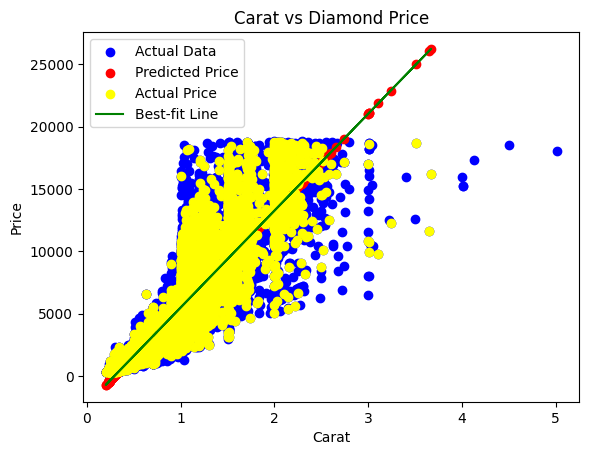

In [73]:
spend = diamonds[['carat']].values   # Feature
y = diamonds['price'].values         # Target

spend_train, spend_test, y_train, y_test = train_test_split(
    spend, y, test_size=0.25, random_state=42
)

lin_model1 = LinearRegression()
lin_model1.fit(spend_train, y_train)

prediction = lin_model1.predict(spend_test)

#ploting
plt.scatter(spend, y, color='blue', label='Actual Data')
plt.scatter(spend_test, prediction, color='red', label='Predicted Price')
plt.scatter(spend_test, y_test, color='yellow', label='Actual Price')
plt.plot(spend_test, prediction, color='green', label='Best-fit Line')

plt.title("Carat vs Diamond Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.legend()
plt.show()


[3253.21322141 4728.33886624 2166.27853575 ... 1778.08757658 2088.64034391
 3486.12779691]


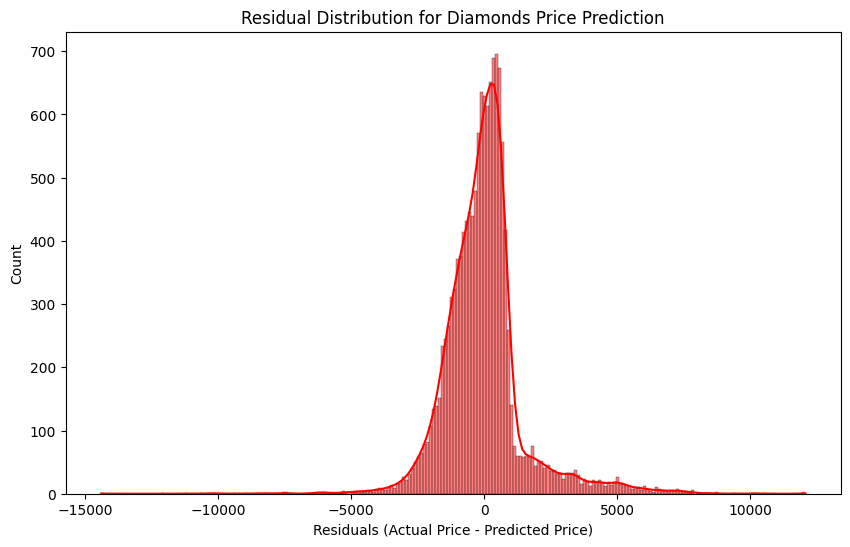

In [76]:
residuals = y_test - prediction

print(prediction)

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')

plt.xlabel('Residuals (Actual Price - Predicted Price)')
plt.title('Residual Distribution for Diamonds Price Prediction')
plt.show()
